## HPCCG
clang++-5.0.1 -g -O3 -funroll-loops -march=native    
  
(**Haswell**) Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz  
-- 18 cpu cores, 72 threads.  
-- 2 Memory Load Ports. 

`mulsd`: 5 cycles  
`movsd`: 3 cycles  
L1 Cache: 32 kB, 8 way, 64 sets, 64 B line size, **latency 4**, per core.    
L2 Cache: 256 kB, 8 way, 512 sets, 64 B line size, **latency 12**, per core.  
Data from Agner 

| Empirical Roofline Toolkit | L1 Cache | L2 Cache | L3 Cache | DRAM |
|:---|:------:|:--------:|:----------:|:-----|
|Cache Lines / Cycle | .9715 | .3050 | 0.2188 | 0.1067 |

---
|`HPC_sparsemv( )`|  CPUTIME  | Inst per Cycle | L1 DC Miss % | L2 DC Miss % | L1 Loads/Cycle | L2 Bandwidth Used |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|
| **Serial Run** | 80.6%  |    1.04     | 7.5%  |39.5%  | 0.98 | 14.7% |
|** 18 Thread Run** | 62.7% | 0.62 | 8.0% | 46.1% | 0.44 | 11.8% |
|**72 Thread Run** | 44.9%  |    0.52    | 8.7%  |65.0% | 0.29 | 3.0% |
```c
|66|int HPC_sparsemv( HPC_Sparse_Matrix *A,                  
|67|		 const double * const x, double * const y)
|68|{
|69|
|70|  const int nrow = (const int) A->local_nrow;
|71|
|72|#ifdef USING_OMP
|73|#pragma omp parallel for
|74|#endif
|75|  for (int i=0; i< nrow; i++)
|76|    {
|77|      double sum = 0.0;
|78|      const double * const cur_vals = 
|79|     (const double * const) A->ptr_to_vals_in_row[i];
|80|
|81|      const int    * const cur_inds = 
|82|     (const int    * const) A->ptr_to_inds_in_row[i];
|83|
|84|      const int cur_nnz = (const int) A->nnz_in_row[i];
|85|
|86|      for (int j=0; j< cur_nnz; j++)                     //  9.9% CPUTIME(E)
```
|`Line 87` |  CPUTIME  | Inst per Cycle | L1 DC Miss % | L2 DC Miss % | L1 Loads/Cycle | L2 Bandwidth Used |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|
|**Serial Run** | 58.8%  |    1.09    | 7.6%  | 39.5% | 0.97 | 14.6% |
|**18 Thread Run** | 50.9% | 0.64 | 8.0% | 46.3% | 0.43 | 11.4% |
|**72 Thread Run** | 41.7%  |    0.48     | 8.7% | 64.8% | 0.39 | 2.8%|
```c
|87|        sum += cur_vals[j]*x[cur_inds[j]];             
|88|      y[i] = sum;
|89|    }
|90|  return(0);
|91|}
```

### Memory Bound - Latency


---
### Scaling 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

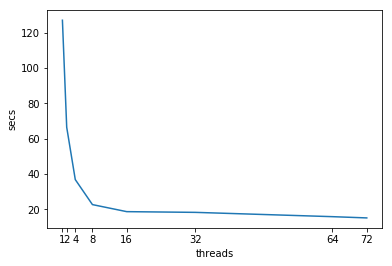

In [21]:
plt.plot([1,2,4,8,16,32,64,72], [127.041, 66.508, 36.896, 22.751, 18.762, 18.358, 15.923, 15.216])
plt.ylabel('secs')
plt.xlabel('threads')
plt.xticks([1,2,4,8,16,32,64,72])
plt.show()